In [1]:
import json

import numpy as np
import pandas as pd
import seaborn

In [6]:
datasets = [
    'avila',
    'banknote',
    'cancerwisconsin',
    'car',
    'credit',
    'crowd',
    'data0',
    'data5',
    'data10',
    'data25',
    'data50',
    'diabetes',
    'digits',
    'frog-family',
    'frog-genus',
    'frog-species',
    'htru',
    'ionosfera',
    'iranian',
    'iris',
    'mice',
    'mushroom',
    'myocardial',
    'obesity',
    'occupancy',
    'pen',
    'robot',
    'sensorless',
    'shill',
    'sonar',
    'vowel',
    'wifi',
    'wine'
]

models = ['RRLClassifier', 'WeaklySupervisedKNeighborsClassifier', 'WeaklySupervisedKRadiusClassifier', 'GRMLogistic',
          'GRMSVM',
          'PseudoLabelsClassifier', 'DELIN']

shortened_names = ["RRLC", "WSKNC", "WSKRC", "GRML", "GRMSVM", "PLC", "DELIN"]

palette = seaborn.color_palette("colorblind", 4)
colors = [palette[0] if 'GR' in n
          else palette[1] if 'RS' in n and 'G' not in n
else palette[2] for n in shortened_names]
color_map = dict(zip(shortened_names, colors))

names_dict = dict(zip(models, shortened_names))

files = ['./Results/JSON/' + name + '.json' for name in datasets]

attributes = ["Classes", "Features", "OriginalRows"]

metrics = ['balacc', 'acc', 'microf1', 'macrof1', 'time']
metric_dict = {'balacc': 'Balanced Accuracy',
               'acc': 'Accuracy',
               'microf1': 'Micro-average F1',
               'macrof1': 'Macro-average F1',
               'time': 'Running Time (ms - log scale)'}

metric_rank_dict = {'balacc': 'Ranks (Balanced Accuracy)',
                    'acc': 'Ranks (Accuracy)',
                    'microf1': 'Ranks (Micro-average F1)',
                    'macrof1': 'Ranks (Macro-average F1)',
                    'time': 'Ranks (Running Time)'}

names_dict

{'RRLClassifier': 'RRLC',
 'WeaklySupervisedKNeighborsClassifier': 'WSKNC',
 'WeaklySupervisedKRadiusClassifier': 'WSKRC',
 'GRMLogistic': 'GRML',
 'GRMSVM': 'GRMSVM',
 'PseudoLabelsClassifier': 'PLC',
 'DELIN': 'DELIN'}

In [7]:
df_acc = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_time = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_balacc = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_microf1 = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_macrof1 = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)

df_atts = pd.DataFrame(np.zeros((len(datasets), len(attributes))), index=datasets, columns=attributes)

dic = dict(zip(metrics, [df_acc, df_time, df_balacc, df_microf1, df_macrof1]))

In [8]:
for dataset in datasets:
    file = './Results/JSON/' + dataset + '.json'
    with open(file) as f:
        data = json.load(f)
    for model in models:
        for metric in metrics:
            if (model + " - " + metric) in data.keys():
                dic[metric].loc[dataset, names_dict[model]] = data[model + " - " + metric]
                if data[model + " - " + metric] > 1 and metric != 'time':
                    print(dataset)
    for attr in attributes:
        df_atts.loc[dataset, attr] = data[attr]
dic['balacc']

,RRLC,WSKNC,WSKRC,GRML,GRMSVM,PLC,DELIN
avila,0.380580,0.357053,0.100000,0.100000,0.100000,0.176576,0.313537
banknote,0.999107,0.997321,0.500000,0.500000,0.500000,0.959010,0.993263
cancerwisconsin,0.973062,0.968851,0.500000,0.500000,0.500000,0.964565,0.966485
car,0.681868,0.322508,0.250000,0.250000,0.250000,0.482874,0.366295
credit,0.601905,0.636190,0.500000,0.500000,0.500000,0.631667,0.564048
crowd,0.594886,0.662301,0.166667,0.166667,0.166667,0.431196,0.640822
data0,0.164147,0.324345,0.100000,0.100000,0.100000,0.279896,0.255509
data5,0.153882,0.294271,0.100000,0.100000,0.100000,0.246441,0.231857
data10,0.148239,0.310378,0.100000,0.100000,0.100000,0.244732,0.218832
data25,0.138292,0.248480,0.100000,0.100000,0.100000,0.213169,0.173409


In [9]:
average_df = pd.DataFrame(np.zeros((len(models), len(metrics))), index=shortened_names, columns=metrics)

for metric in metrics:
    average_df.loc[:, metric] = dic[metric].mean()
average_df

,balacc,acc,microf1,macrof1,time
RRLC,0.725268,0.786244,0.786244,0.729217,23.284350
WSKNC,0.723041,0.785829,0.785829,0.721949,0.054333
WSKRC,0.272565,0.436210,0.436210,0.189776,0.088300
GRML,0.271960,0.377215,0.377215,0.176240,395.905446
GRMSVM,0.271960,0.377215,0.377215,0.176240,390.541909
PLC,0.647564,0.740487,0.740487,0.649150,23.883404
DELIN,0.696687,0.761455,0.761455,0.691909,13.683233


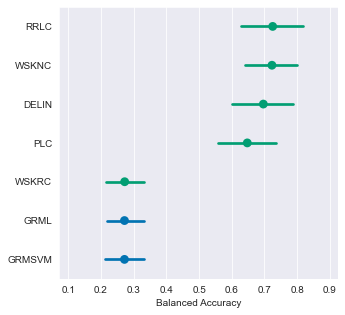

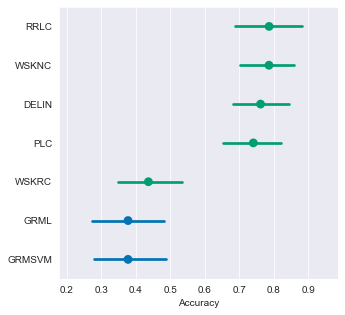

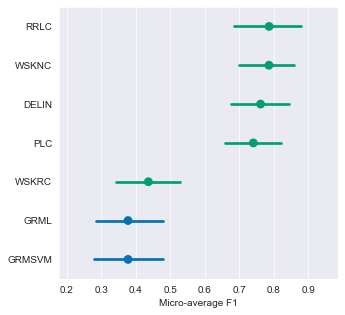

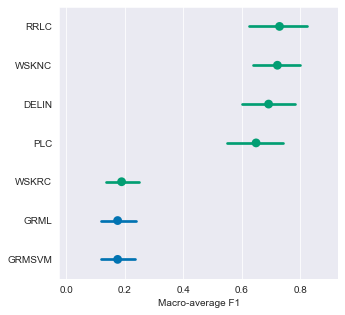

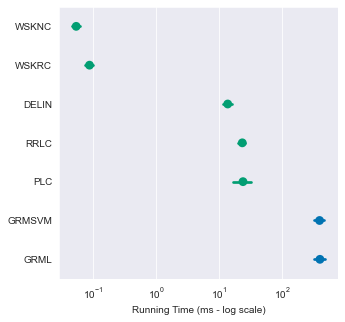

In [10]:
import seaborn
import matplotlib.pyplot as plt

for metric in metrics:
    plt.figure(figsize=(5, 5))
    if metric != 'time':
        seaborn.pointplot(data=pd.DataFrame(dic[metric], index=dic[metric].index, columns=dic[metric].columns),
                          orient='h',
                          palette=color_map,
                          saturation=1,
                          order=list(average_df.sort_values(metric, ascending=False).index))

        plt.xlim(average_df[metric].min() - 0.2, average_df[metric].max() + 0.2)
    else:
        seaborn.pointplot(data=pd.DataFrame(dic[metric],
                                            index=dic[metric].index, columns=dic[metric].columns),
                          orient='h', palette=color_map, saturation=1,
                          order=list(average_df.sort_values(metric).index))
        plt.xscale('log')
    plt.xlabel(metric_dict[metric])
    plt.savefig('./Figures/vals_' + metric + ".png", dpi=300, bbox_inches='tight')

In [11]:
from scipy.stats import rankdata

ranks_df = pd.DataFrame(np.zeros((len(models), len(metrics))), index=shortened_names, columns=metrics)

for metric in metrics:
    m = -1
    if metric == 'time':
        m = 1
    ranks = pd.DataFrame(rankdata(m * dic[metric], axis=1),
                         index=dic[metric].index, columns=dic[metric].columns)
    ranks_df.loc[:, metric] = ranks.mean()
ranks_df

,balacc,acc,microf1,macrof1,time
RRLC,2.090909,1.878788,1.878788,2.000000,4.636364
WSKNC,1.818182,1.924242,1.924242,1.818182,1.030303
WSKRC,5.954545,5.590909,5.590909,5.651515,1.969697
GRML,6.000000,6.136364,6.136364,6.151515,6.484848
GRMSVM,6.000000,6.136364,6.136364,6.151515,6.515152
PLC,3.272727,3.287879,3.287879,3.212121,3.878788
DELIN,2.863636,3.045455,3.045455,3.015152,3.484848


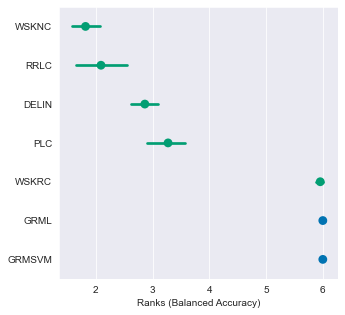

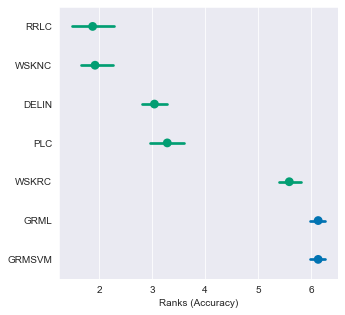

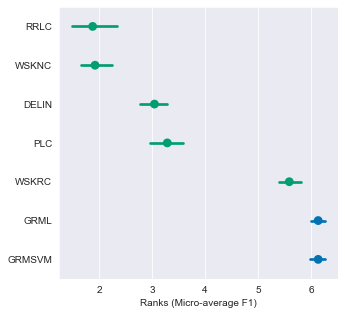

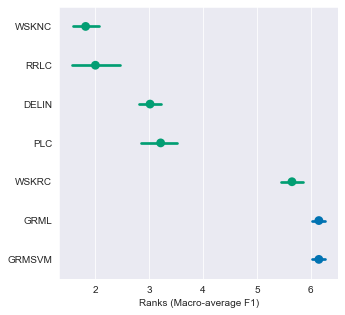

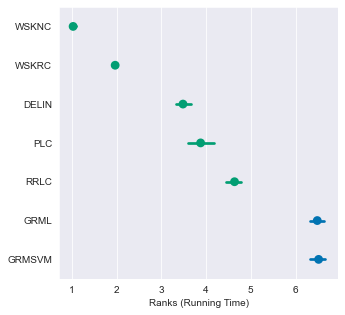

In [12]:
import seaborn

for metric in metrics:
    plt.figure(figsize=(5, 5))
    m = -1
    if metric == 'time':
        m = 1
    seaborn.pointplot(data=pd.DataFrame(rankdata(m * dic[metric], axis=1),
                                        index=dic[metric].index, columns=dic[metric].columns),
                      orient='h', palette=color_map, saturation=1,
                      order=list(ranks_df.sort_values(metric).index))
    plt.xlabel(metric_rank_dict[metric])
    plt.savefig('./Figures/ranks_' + metric + ".png", dpi=300, bbox_inches='tight')

In [13]:
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman, sign_table

friedman_pvals = {}
dic_posthoc_pvals = {}
table_pvals = {}

for metric in metrics:
    _, pvalue = friedmanchisquare(*(dic[metric].values[i, :] for i in range(dic[metric].shape[0])))
    friedman_pvals[metric] = pvalue
    pvalues = posthoc_nemenyi_friedman(dic[metric])
    dic_posthoc_pvals[metric] = pvalues
    table_pvals[metric] = sign_table(pvalues)
dic_posthoc_pvals[metric]

,RRLC,WSKNC,WSKRC,GRML,GRMSVM,PLC,DELIN
RRLC,1.000000,0.001000,0.001000,0.009204,0.007511,0.761868,0.314549
WSKNC,0.001000,1.000000,0.560837,0.001000,0.001000,0.001000,0.001000
WSKRC,0.001000,0.560837,1.000000,0.001000,0.001000,0.006110,0.066312
GRML,0.009204,0.001000,0.001000,1.000000,0.900000,0.001000,0.001000
GRMSVM,0.007511,0.001000,0.001000,0.900000,1.000000,0.001000,0.001000
PLC,0.761868,0.001000,0.006110,0.001000,0.001000,1.000000,0.900000
DELIN,0.314549,0.001000,0.066312,0.001000,0.001000,0.900000,1.000000


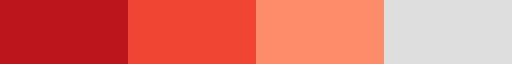

In [14]:
pvals_palette = seaborn.color_palette("Reds", 4)
pvals_palette[0] = 'gainsboro'
#pvals_palette[1] = 'white'
# pvals_palette

from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('Custom', pvals_palette[::-1], len(pvals_palette))
cmap

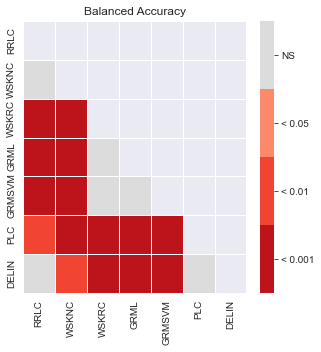

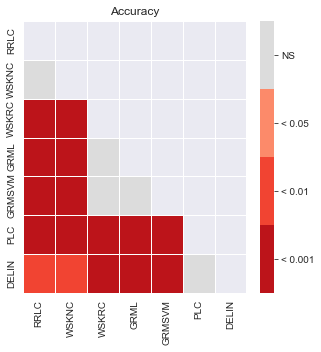

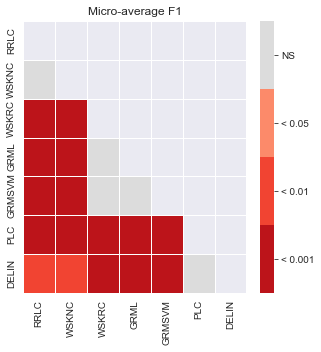

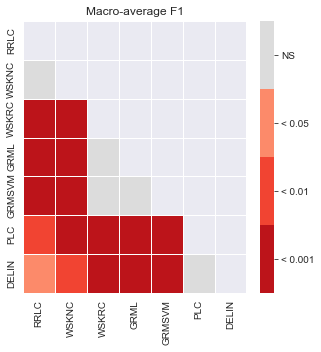

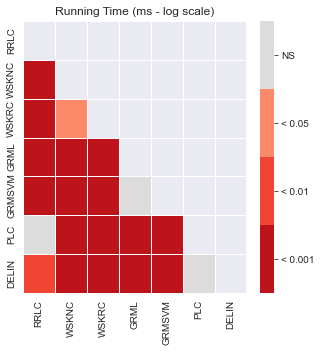

In [15]:
n = 4
vmap = ["< 0.001", "< 0.01", "< 0.05", "NS"]
for metric in metrics:
    plt.figure(figsize=(5, 5))
    matrix = np.tril(dic_posthoc_pvals[metric])
    ones = np.triu(np.ones(matrix.shape))
    matrix += ones
    matrix = pd.DataFrame(matrix, index=shortened_names, columns=shortened_names)
    mask = np.zeros_like(matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    ax = seaborn.heatmap(matrix,
                         mask=mask, linewidth=1, linecolor='white',
                         annot=False, fmt=".3f",
                         cmap=cmap, cbar=True)
    colorbar = ax.collections[0].colorbar
    # The list comprehension calculates the positions to place the labels to be evenly distributed across the colorbar
    r = colorbar.vmax - colorbar.vmin
    colorbar.set_ticks([colorbar.vmin + 0.5 * r / n + r * i / n for i in range(n)])
    colorbar.set_ticklabels(vmap)
    plt.title(metric_dict[metric])
    plt.savefig("./Figures/pvalues_" + metric + ".png", dpi=300, bbox_inches='tight')